# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [15]:
bond_lengths = np.linspace(0.2,2.6,15)

In [16]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

converged SCF energy = 0.164175012061695
E = 0.15748213479836348 Eh
converged SCF energy = -0.839684083956067
E = -0.848899105754729 Eh
converged SCF energy = -1.07486102490599
E = -1.0882281842437163 Eh
converged SCF energy = -1.11750157922789
E = -1.1369289593879264 Eh
converged SCF energy = -1.09513510118901
E = -1.1229570528666362 Eh
converged SCF energy = -1.04953250777026
E = -1.0887645366068754 Eh
converged SCF energy = -0.995976005034107
E = -1.0504420373457728 Eh
converged SCF energy = -0.941480654707798
E = -1.0154682492882445 Eh
converged SCF energy = -0.889889958382754
E = -0.9873930556257475 Eh
converged SCF energy = -0.843174458569733
E = -0.9670259116896882 Eh
converged SCF energy = -0.80213543384489
E = -0.953424238929029 Eh
converged SCF energy = -0.766864889751915
E = -0.9449089871327179 Eh
converged SCF energy = -0.737027158095765
E = -0.9398197912427146 Eh
converged SCF energy = -0.712060259734193
E = -0.9368706035430503 Eh
converged SCF energy = -0.691327561197377


In [17]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

converged SCF energy = 0.164175012061695
converged SCF energy = 0.164175012061696
E = 0.16417501206169582 Eh
converged SCF energy = -0.839684083956067
converged SCF energy = -0.839684083956067
E = -0.8396840839560673 Eh
converged SCF energy = -1.07486102490599
converged SCF energy = -1.07486102490599
E = -1.0748610249059865 Eh
converged SCF energy = -1.11750157922789
converged SCF energy = -1.11750157922789
E = -1.1175015792278884 Eh
converged SCF energy = -1.09513510118901
converged SCF energy = -1.09513510118901
E = -1.0951351011890111 Eh
converged SCF energy = -1.04953250777026
converged SCF energy = -1.04953250777026
E = -1.0495325077702624 Eh
converged SCF energy = -0.995976005034107
converged SCF energy = -0.995976005034107
E = -0.9959760050341071 Eh
converged SCF energy = -0.941480654707798
converged SCF energy = -0.941480654707798
E = -0.9414806547077981 Eh
converged SCF energy = -0.889889958382754
converged SCF energy = -0.889889958382754
E = -0.889889958382754 Eh
converged SC

In [18]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

converged SCF energy = 0.164175012061695
E(CCSD) = 0.1574821318755476  E_corr = -0.006692880186148211
E = 0.1574821318755476 Eh
converged SCF energy = -0.839684083956067
E(CCSD) = -0.8488991194884047  E_corr = -0.009215035532337346
E = -0.8488991194884047 Eh
converged SCF energy = -1.07486102490599
E(CCSD) = -1.088228226369216  E_corr = -0.0133672014632297
E = -1.0882282263692162 Eh
converged SCF energy = -1.11750157922789
E(CCSD) = -1.136929092564816  E_corr = -0.01942751333692788
E = -1.1369290925648163 Eh
converged SCF energy = -1.09513510118901
E(CCSD) = -1.122957052870124  E_corr = -0.02782195168111283
E = -1.122957052870124 Eh
converged SCF energy = -1.04953250777026
E(CCSD) = -1.088764536633295  E_corr = -0.03923202886303243
E = -1.0887645366332948 Eh
converged SCF energy = -0.995976005034107
E(CCSD) = -1.050442037622604  E_corr = -0.0544660325884966
E = -1.0504420376226038 Eh
converged SCF energy = -0.941480654707798
E(CCSD) = -1.015468249382002  E_corr = -0.07398759467420368
E

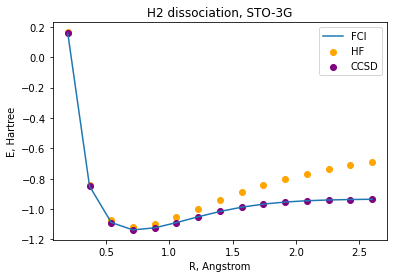

In [19]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [20]:
bond_lengths = np.linspace(0.5,2.7,15)

In [21]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14278405666448 Eh
converged SCF energy = -74.4533755394603
E = -74.4752320512475 Eh
converged SCF energy = -74.8704749148691
E = -74.9041337800464 Eh
converged SCF energy = -74.9629980695872
E = -75.01383133947517 Eh
converged SCF energy = -74.9280772606054
E = -75.00356512179698 Eh
converged SCF energy = -74.8427106360511
E = -74.95170869149439 Eh
converged SCF energy = -74.7404009823898
E = -74.89218648240376 Eh
converged SCF energy = -74.6356397052129
E = -74.83923063682428 Eh
converged SCF energy = -74.5355993564525
E = -74.79866365949067 Eh
converged SCF energy = -74.4447494379006
E = -74.7716151519376 Eh
converged SCF energy = -74.3648409739232
E = -74.75568947210505 Eh
converged SCF energy = -74.2975641705531
E = -74.74704715180509 Eh
converged SCF energy = -74.2414470355422
E = -74.65097549251536 Eh
converged SCF energy = -74.2701898592245
E = -74.73852377799332 Eh
SCF not converged.
SCF energy = -72.9771284539995
E = -74.7377733

In [22]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

converged SCF energy = -73.1294523897688
converged SCF energy = -73.1294523897689
E = -73.12945238976886 Eh
converged SCF energy = -74.4533755394603
converged SCF energy = -74.4533755394604
E = -74.45337553946035 Eh
converged SCF energy = -74.870474914869
converged SCF energy = -74.870474914869
E = -74.87047491486898 Eh
converged SCF energy = -74.9629980695871
converged SCF energy = -74.9629980695871
E = -74.96299806958712 Eh
converged SCF energy = -74.9280772606054
converged SCF energy = -74.9280772606054
E = -74.9280772606054 Eh
converged SCF energy = -74.8427106360511
converged SCF energy = -74.8427106360511
E = -74.84271063605108 Eh
converged SCF energy = -74.7404009823899
converged SCF energy = -74.7404009823899
E = -74.74040098238986 Eh
converged SCF energy = -74.6356397052129
converged SCF energy = -74.6356397052129
E = -74.63563970521294 Eh
converged SCF energy = -74.5355993564524
converged SCF energy = -74.5355993564521
E = -74.53559935645214 Eh
converged SCF energy = -74.4447

In [23]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

converged SCF energy = -73.1294523897688
E(CCSD) = -73.14276521635897  E_corr = -0.0133128265901215
E = -73.14276521635897 Eh
converged SCF energy = -74.4533755394603
E(CCSD) = -74.4751962786212  E_corr = -0.0218207391607839
E = -74.4751962786212 Eh
converged SCF energy = -74.870474914869
E(CCSD) = -74.90406496739166  E_corr = -0.03359005252268953
E = -74.90406496739166 Eh
converged SCF energy = -74.9629980695872
E(CCSD) = -75.01370059196519  E_corr = -0.05070252237808298
E = -75.01370059196519 Eh
converged SCF energy = -74.9280772606054
E(CCSD) = -75.00329904142166  E_corr = -0.0752217808162049
E = -75.00329904142166 Eh
converged SCF energy = -74.8427106360511
E(CCSD) = -74.95116129966114  E_corr = -0.108450663610081
E = -74.95116129966114 Eh
converged SCF energy = -74.7404009823899
E(CCSD) = -74.89127919056961  E_corr = -0.1508782081797501
E = -74.8912791905696 Eh
converged SCF energy = -74.6356397052129
E(CCSD) = -74.83854079640631  E_corr = -0.2029010911934012
E = -74.8385407964063

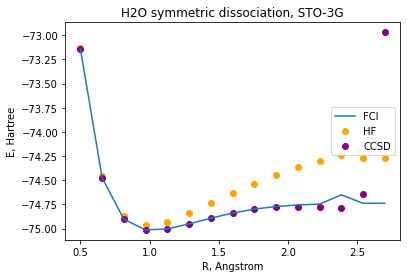

In [24]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## Question 1.
Q) Among classical methods, there are techniques based on the variational approach, and those that are not. Identify
variational methods among those that were used and explain advantages of the variational approach. Are there any
arguments for using non-variational techniques?

A) First, the variational method is defined as below:

$ \epsilon[\Psi] = \frac{\langle \Psi | H | \Psi \rangle}{\langle \Psi | \Psi \rangle} $

- $ \epsilon \ge E_0 $, where $ E_0 $ is the ground state energy of $ H $.
- $ \epsilon = E_0 $, if and only if $ \Psi $ is the ground state of $ H $.


1. Hartree Fock method is variational.
2. Configuration Interaction is variational.
3. Coupled Cluster is NOT variational.

## Question 2.
Q) Optional: There is another division between classical methods, it is based on so-called separability or
size-consistency. Simply speaking, if one investigates two molecular fragments (A and B) at a large distance
from each other ($ ∼ 100 Å $) then the total electronic energy should be equal to the sum $E_{A+B} = E_A + E_B},
where the energy of each fragment (EA or EB) can be obtained in a
calculation that does not involve the other fragment. If this condition is satisfied for a particular
method, this method is separable or size-consistent. Check separability of HF, CISD, and CCSD
by taking 2 H2 fragments at a large distance from each other and comparing the total energy with
2 energies of one H2 molecule. Explain your results.